# RC Circuit
Practical Electronics pg 106

## RC Charging Schematic
$V_R$ = Voltage over the resistor

$V_C$ = Voltage over the capacitor

$I$ = Current through both.

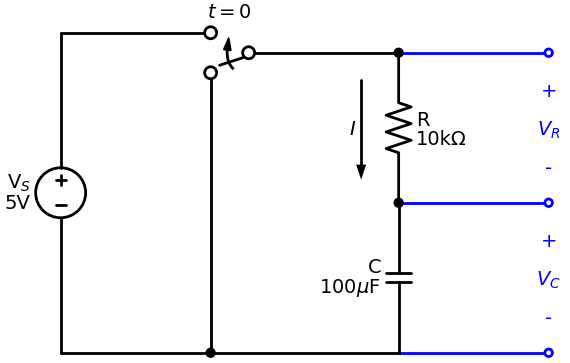

In [11]:
# RC Circuit Charging Schematic
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    mc = 'blue'
    b = elm.Line().right()
    s = elm.SwitchSpdt2(action='close').left().anchor('c').label('$t=0$')
    elm.Line().right().dot().at(s.a)
    d.push()
    elm.Line().dot(open=True).color(mc)
    elm.Gap().down().label(['+','$V_R$','-']).dot(open=True).color(mc)
    elm.Gap().label(['+','$V_C$','-']).dot(open=True).color(mc)
    elm.Line().left().color(mc)
    d.pop()
    r = elm.Resistor().down().label('R\n10kΩ', loc='bot').dot()
    elm.CurrentLabel(top=False, ofst=0.5).at(r).label('$I$')
    d.push()
    elm.Line().right().color(mc)
    d.pop()
    elm.Capacitor().label('C\n100$\\mu$F')
    elm.Line().left().tox(b.start)
    v = elm.SourceV().toy(b.start).label('V$_S$\n5V')
    elm.Line().at(s.b).toy(v.start).dot()

## Charging a RC circuit.
Voltage and Current flow over Time for DC Voltage.

$ {I} = \frac{V_S}{R}e^{-t/RC} $

$ {V_R} = {I}{R} = {V_S}e^{-t/RC} $

$ {V_C} = \frac{1}{C}\int{I}{dt} = {V_S}(1-e^{-t/RC}) $

$ \tau = {RC} $ time constant. (This can be relatively large. I.e. seconds, compared to $\tau = \frac{L}{R}$ for an RL circuit.)

Notice at ${t} \geq 5 \tau$ (or ${t} \geq 5{RC}$):
* $I \approx 0$ A - No current.
* ${V_R} \approx 0$ V - No voltage drop over the resistor.
* ${V_C} \approx {V_S}$ - Capacitor charged to $V_S$

In [9]:
# RC Charging Voltage and Current Flow
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def rl_plot(Vs=5, R_kohms=10, C_uF=100, Duration_sec=5):
    C = C_uF/1e6 # uF -> F
    R = R_kohms * 1e3 # k ohms -> ohms
    t = np.linspace(start=0, stop=Duration_sec, num=100)
    if (R==0):
        R=1
    tc = R*C
    Vr = Vs * np.exp(-t / tc)
    Vc = Vs * (1 - np.exp(-t / tc))
    I = Vr/R*1000 # A -> mA

    fig, vp = plt.subplots(figsize=(8, 6))
    vp.set_xlabel('Time (secs)')
    vp.set_ylabel('Voltage (V)')
    vp.set_ylim((0,Vs))
    vp.plot(t, Vr, label='$V_R$')
    vp.plot(t, Vc, label='$V_C$')
    vp.grid(True)
    vp.legend(loc='upper left')
    vp.set_title("Charging an RC Circuit\n5$\\tau$ = 5$RC$ = {tc:.1f}s".format(tc=tc*5))

    ip = vp.twinx()
    color = 'tab:green'
    ip.set_ylabel('Current (mA)', color=color)
    ip.set_ylim((0,1))
    ip.plot(t, I, label='$I$', color=color)
    ip.tick_params(axis='y', labelcolor=color)
    ip.legend(loc='lower right')
    plt.show()

interact(rl_plot, Vs=(1, 10, 1.0), R_kohms=(10, 500, 10), C_uF=(50, 1000, 50), Duration_sec=(1, 60, 1))

interactive(children=(FloatSlider(value=5.0, description='Vs', max=10.0, min=1.0, step=1.0), IntSlider(value=1…

<function __main__.rl_plot(Vs=5, R_kohms=10, C_uF=100, Duration_sec=5)>

## Discharging RC Schematic

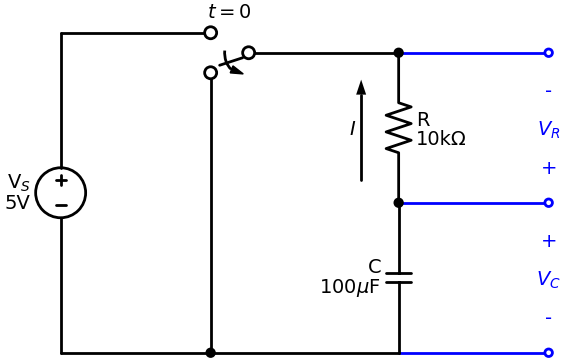

In [7]:
# RC Circuit Discharge Schematic
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    mc = 'blue'
    b = elm.Line().right()
    s = elm.SwitchSpdt2(action='open').left().anchor('c').label('$t=0$')
    elm.Line().right().dot().at(s.a)
    d.push()
    elm.Line().dot(open=True).color(mc)
    elm.Gap().down().label(['-','$V_R$','+']).dot(open=True).color(mc)
    elm.Gap().label(['+','$V_C$','-']).dot(open=True).color(mc)
    elm.Line().left().color(mc)
    d.pop()
    r = elm.Resistor().down().label('R\n10kΩ', loc='bot').dot()
    elm.CurrentLabel(top=False, ofst=0.5).at(r).reverse().label('$I$')
    d.push()
    elm.Line().right().color(mc)
    d.pop()
    elm.Capacitor().label('C\n100$\\mu$F')
    elm.Line().left().tox(b.start)
    v = elm.SourceV().toy(b.start).label('V$_S$\n5V')
    elm.Line().at(s.b).toy(v.start).dot()

## Discharging a RC Circuit
Voltage and Current flow over time.

$ {I} = \frac{V_S}{R}e^{-t/RC} $

$ {V_R} = {I}{R} = {V_S}e^{-t/RC} $

$ {V_C} = \frac{1}{C}\int_0{I}{dt} = {V_S}e^{-t/RC} $

$ \tau = {RC} $ time constant

Notice:
* At ${t} = 0$, $V_R$'s polarity is reversed, and goes from 0V to $V_C$ instantly (assuming ideal circuit components); and
* At ${t} = 0$, ${V_C} = {V_S}$
* ${V_R} = {V_C}$ for ${t} \geq 0$. I.e. the voltage across both the resistor and capacitor, drop together.
* By ${t} = 5 \tau$, ${V_C} \approx 0$ V, and ${V_R} \approx 0$ V, and ${I} \approx 0$ A - No voltage across R or C, and no current.

In [ ]:
# RC Circuit Discharge 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def rl_plot(Vs=5, R_kohms=10, C_uF=100, Duration_sec=5):
    C = C_uF/1e6 # uF -> F
    R = R_kohms * 1e3 # k ohms -> ohms
    t = np.linspace(start=0, stop=Duration_sec, num=100)
    if (R==0):
        R=1
    tc = R*C
    Vr = Vs * np.exp(-t / tc)
    I = Vr/R*1000 # A -> mA

    fig, vp = plt.subplots(figsize=(8, 6))
    vp.set_xlabel('Time (secs)')
    vp.set_ylabel('Voltage (V)')
    vp.set_ylim((0,Vs))
    vp.plot(t, Vr, label='$V_R$ and $V_C$')
    vp.grid(True)
    vp.legend(loc='upper left')
    vp.set_title("Discharging an RC Circuit\n5$\\tau$ = 5$RC$ = {tc:.1f}s".format(tc=tc*5))

    ip = vp.twinx()
    color = 'tab:green'
    ip.set_ylabel('Current (mA)', color=color)
    ip.set_ylim((0,1))
    ip.plot(t, I, label='$I$', color=color)
    ip.tick_params(axis='y', labelcolor=color)
    ip.legend(loc='lower right')
    plt.show()

interact(rl_plot, Vs=(1, 10, 1.0), R_kohms=(10, 500, 10), C_uF=(50, 1000, 50), Duration_sec=(1, 60, 1))

interactive(children=(FloatSlider(value=5.0, description='Vs', max=10.0, min=1.0, step=1.0), IntSlider(value=1…

<function __main__.rl_plot(Vs=5, R_kohms=10, C_uF=100, Duration_sec=5)>